In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from geopy.distance import lonlat, distance

In [2]:
df = pd.read_csv("~/Documents/data/strava/output1.csv")
df.head()

,timestamp,latitude,longitude,elevation,heart_rate
0,2020-06-20T08:00:02Z,51.454496,-0.217755,35.2,104
1,2020-06-20T08:00:03Z,51.454506,-0.217767,35.2,104
2,2020-06-20T08:00:04Z,51.454520,-0.217782,35.3,103
3,2020-06-20T08:00:11Z,51.454672,-0.217944,35.8,102
4,2020-06-20T08:00:14Z,51.454734,-0.218025,36.0,108


In [3]:
def point_distance(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    if np.isnan(lat1) or np.isnan(lat2) or np.isnan(lon1) or np.isnan(lon2):
        return np.nan
    p1 = lonlat(x=lon1, y=lat1)
    p2 = lonlat(x=lon2, y=lat2)
    return distance(p1, p2).m

In [4]:
df.columns
df['timestamp2'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp2', inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['time_delta'] = df.index.to_series().diff().apply(lambda x: x.seconds)

In [5]:
# add shifted lon/lat to DF1
sdf = df.shift(periods=-1)
df['next_latitude'] = sdf['latitude']
df['next_longitude'] = sdf['longitude']
df['next_timestamp'] = sdf['timestamp']
df['distance'] = df.apply(lambda x: point_distance(x.latitude, x.longitude, x.next_latitude, x.next_longitude), axis=1)
df['time'] = df.apply(lambda x: (x.next_timestamp - x.timestamp).seconds, axis=1)
df['velocity'] = df.distance / df.time

In [6]:
df.head()

,timestamp,latitude,longitude,elevation,heart_rate,next_latitude,next_longitude,next_timestamp,distance,time,velocity
timestamp2,,,,,,,,,,,
2020-06-20 08:00:02+00:00,2020-06-20 08:00:02+00:00,51.454496,-0.217755,35.2,104,51.454506,-0.217767,2020-06-20 08:00:03+00:00,1.390525,1.0,1.390525
2020-06-20 08:00:03+00:00,2020-06-20 08:00:03+00:00,51.454506,-0.217767,35.2,104,51.454520,-0.217782,2020-06-20 08:00:04+00:00,1.874358,1.0,1.874358
2020-06-20 08:00:04+00:00,2020-06-20 08:00:04+00:00,51.454520,-0.217782,35.3,103,51.454672,-0.217944,2020-06-20 08:00:11+00:00,20.317077,7.0,2.902440
2020-06-20 08:00:11+00:00,2020-06-20 08:00:11+00:00,51.454672,-0.217944,35.8,102,51.454734,-0.218025,2020-06-20 08:00:14+00:00,8.904002,3.0,2.968001
2020-06-20 08:00:14+00:00,2020-06-20 08:00:14+00:00,51.454734,-0.218025,36.0,108,51.454762,-0.218049,2020-06-20 08:00:15+00:00,3.533752,1.0,3.533752


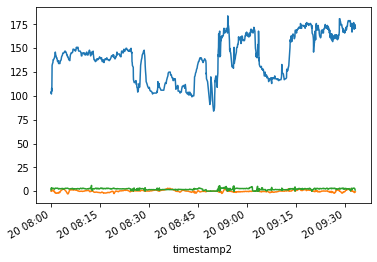

In [7]:
df['heart_rate'].plot()
df['elevation'].diff(2).plot()
df['velocity'].plot()

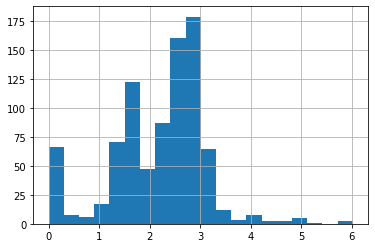

In [11]:
df['velocity'].hist(bins=20)

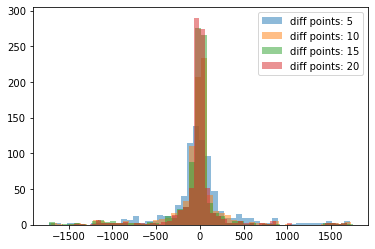

In [8]:
plt.clf()
start = 5
steps = 5
delta = 5
for i in range(start, start*steps, delta):
    subdf = (df['heart_rate'] / df['elevation'].diff(i)).replace([np.inf, -np.inf], np.nan).dropna() # .hist(alpha=0.5)
    # print(subdf.describe())
    plt.hist(subdf, bins=50, alpha=0.5, label=f"diff points: {i}")
plt.legend()

In [9]:
df['time_delta'].hist(bins=20)

KeyError: 'time_delta'